Following https://www.learnopencv.com/facial-landmark-detection/ 
I will use dlib mentioned by above post instead of opencv poor functions(
See: https://www.learnopencv.com/facemark-facial-landmark-detection-using-opencv/ )

Firstly, dlib(https://github.com/davisking/dlib) provide many algorithms 而不止图形学那些算法。不过我们这里要用到
它python_examples下一个叫face_landmark_detection.py的文件里实现的找脸的landmark(keypoint)的算法，
这个算法是对论文 One Millisecond Face Alignment with an Ensemble of Regression Trees(CVPR 2014) 的实现。
它是训练出的算法（而不是SIFT那种“无监督”的），依赖一个97Mb的数据文件，在那个脚本的注释中写了下载地址。



In [1]:
import sys
import os
import dlib
import glob


In [2]:
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
predictor_path = 'models/shape_predictor_68_face_landmarks.dat'

In [4]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)


In [5]:
img = dlib.load_rgb_image('images/faces/2007_007763.jpg')

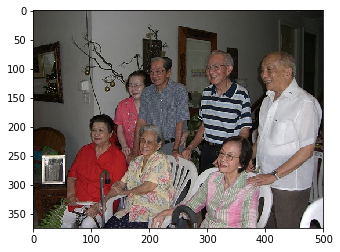

In [6]:
plt.imshow(img)
plt.show()

In [7]:
# Ask the detector to find the bounding boxes of each face. The 1 in the
# second argument indicates that we should upsample the image 1 time. This
# will make everything bigger and allow us to detect more faces.

dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))

Number of faces detected: 7


In [8]:
for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    # Get the landmarks/parts for the face in box d.
    shape = predictor(img, d)
    print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                              shape.part(1)))


Detection 0: Left: 93 Top: 194 Right: 129 Bottom: 230
Part 0: (100, 208), Part 1: (100, 211) ...
Detection 1: Left: 193 Top: 90 Right: 229 Bottom: 126
Part 0: (201, 107), Part 1: (201, 110) ...
Detection 2: Left: 293 Top: 86 Right: 329 Bottom: 122
Part 0: (299, 102), Part 1: (299, 106) ...
Detection 3: Left: 157 Top: 114 Right: 193 Bottom: 150
Part 0: (165, 131), Part 1: (164, 134) ...
Detection 4: Left: 177 Top: 214 Right: 213 Bottom: 250
Part 0: (185, 225), Part 1: (185, 228) ...
Detection 5: Left: 381 Top: 89 Right: 424 Bottom: 132
Part 0: (393, 107), Part 1: (392, 111) ...
Detection 6: Left: 309 Top: 233 Right: 352 Bottom: 276
Part 0: (322, 247), Part 1: (319, 250) ...


In [9]:
k,d

(6, rectangle(309,233,352,276))

In [10]:
shape.rect

rectangle(309,233,352,276)

In [11]:
k,d

(6, rectangle(309,233,352,276))

In [12]:
shape.parts(),len(shape.parts())

(points[(322, 247), (319, 250), (318, 255), (318, 259), (318, 263), (319, 268), (320, 272), (321, 276), (324, 279), (328, 280), (334, 280), (340, 279), (345, 277), (350, 274), (353, 269), (356, 264), (358, 258), (322, 240), (324, 238), (326, 238), (328, 239), (329, 241), (336, 243), (340, 243), (344, 244), (347, 247), (349, 250), (331, 248), (330, 251), (328, 254), (326, 256), (324, 259), (325, 260), (326, 261), (328, 261), (331, 261), (324, 246), (325, 245), (327, 246), (328, 248), (326, 247), (325, 247), (337, 251), (339, 251), (341, 252), (343, 254), (340, 253), (338, 252), (322, 264), (322, 264), (324, 264), (325, 265), (328, 265), (331, 267), (335, 269), (330, 271), (326, 271), (324, 270), (323, 269), (321, 267), (322, 265), (324, 265), (325, 266), (327, 267), (333, 269), (327, 269), (325, 269), (323, 267)],
 68)

In [13]:
img = dlib.load_rgb_image('images/faces/Tom_Cruise_avp_2014_4.jpg')

dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))

for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    # Get the landmarks/parts for the face in box d.
    shape = predictor(img, d)
    print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                              shape.part(1)))


Number of faces detected: 1
Detection 0: Left: 76 Top: 290 Right: 461 Bottom: 675
Part 0: (97, 364), Part 1: (91, 419) ...


In [14]:
parts = np.empty([shape.num_parts, 2], dtype=np.int)
for i,p in enumerate(shape.parts()):
    parts[i,0] = p.x
    parts[i,1] = p.y

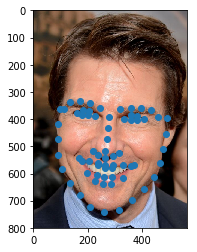

In [15]:
plt.imshow(img)
plt.plot(parts[:,0],parts[:,1],'o')
plt.show()

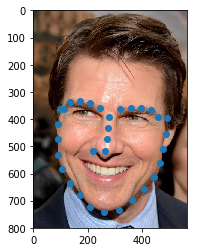

In [16]:
plt.imshow(img)
plt.plot(parts[:32,0],parts[:32,1],'o')
plt.show()

In [17]:
for i in range(parts.shape[0]):
    #plt.figure()
    plt.imshow(img)
    plt.plot(parts[:i+1,0],parts[:i+1,1],'o')
    plt.savefig('images/landmarks/marks+'+str(i)+'.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

经测试68个landmark中，0-26是脸外部轮廓，27-35为鼻子（其中33为鼻子中心）36-41为左眼42-47为右眼，48-60为嘴，61-67为牙齿。

In [18]:
import cv2


In [19]:
(0, 0, img.shape[1], img.shape[0])

(0, 0, 565, 800)

In [20]:
rect = (0, 0, img.shape[1], img.shape[0])
subdiv = cv2.Subdiv2D(rect)


In [21]:
for p in parts :
    # If p is directly feeded into subdiv.insert, the kernel will died(maybe hash problem?)
    subdiv.insert((p[0],p[1]))
    

In [22]:
_img = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

In [23]:
# Check if a point is inside a rectangle
def rect_contains(rect, point) :
    if point[0] < rect[0] :
        return False
    elif point[1] < rect[1] :
        return False
    elif point[0] > rect[2] :
        return False
    elif point[1] > rect[3] :
        return False
    return True

# Draw a point
def draw_point(img, p, color ) :
    cv2.circle( img, p, 2, color, cv2.FILLED, cv2.LINE_AA, 0 )


# Draw delaunay triangles
def draw_delaunay(img, subdiv, delaunay_color ) :

    triangleList = subdiv.getTriangleList();
    size = img.shape
    r = (0, 0, size[1], size[0])

    for t in triangleList :
        
        pt1 = (t[0], t[1])
        pt2 = (t[2], t[3])
        pt3 = (t[4], t[5])
        
        if rect_contains(r, pt1) and rect_contains(r, pt2) and rect_contains(r, pt3) :
        
            cv2.line(img, pt1, pt2, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt2, pt3, delaunay_color, 1, cv2.LINE_AA, 0)
            cv2.line(img, pt3, pt1, delaunay_color, 1, cv2.LINE_AA, 0)


# Draw voronoi diagram
def draw_voronoi(img, subdiv) :

    ( facets, centers) = subdiv.getVoronoiFacetList([])

    for i in range(0,len(facets)) :
        ifacet_arr = []
        for f in facets[i] :
            ifacet_arr.append(f)
        
        ifacet = np.array(ifacet_arr, np.int)
        color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

        cv2.fillConvexPoly(img, ifacet, color, cv2.LINE_AA, 0);
        ifacets = np.array([ifacet])
        cv2.polylines(img, ifacets, True, (0, 0, 0), 1, cv2.LINE_AA, 0)
        cv2.circle(img, (centers[i][0], centers[i][1]), 3, (0, 0, 0), cv2.FILLED, cv2.LINE_AA, 0)


In [24]:
img_copy = img.copy()
draw_delaunay(img_copy, subdiv, (255, 255, 255))

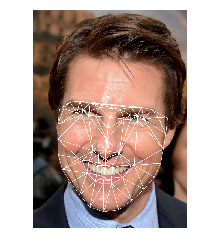

In [25]:
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [26]:

img_copy = img.copy()
draw_voronoi(img_copy, subdiv)

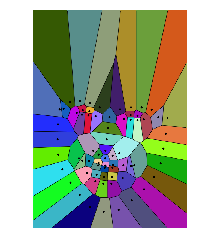

In [27]:
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [28]:
pts = []
for t in subdiv.getTriangleList():
    pt = ((t[0],t[1]), (t[2],t[3]), (t[4],t[5]))
    if rect_contains(rect, pt[0]) and rect_contains(rect, pt[1]) and rect_contains(rect, pt[2]):
        pts.append(np.array(pt))
pts = np.array(pts)

In [29]:
pts.shape

(113, 3, 2)

In [30]:
img = dlib.load_rgb_image('images/JZM1962.jpg')

dets = detector(img, 1)
print("Number of faces detected: {}".format(len(dets)))

for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    # Get the landmarks/parts for the face in box d.
    shape = predictor(img, d)
    print("Part 0: {}, Part 1: {} ...".format(shape.part(0),
                                              shape.part(1)))


Number of faces detected: 1
Detection 0: Left: 92 Top: 142 Right: 315 Bottom: 365
Part 0: (100, 193), Part 1: (101, 220) ...


In [32]:
parts = np.empty([shape.num_parts, 2], dtype=np.int)
for i,p in enumerate(shape.parts()):
    parts[i,0] = p.x
    parts[i,1] = p.y

parts.shape

(68, 2)

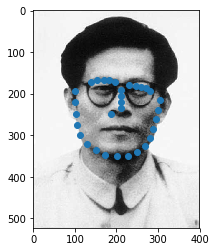

In [33]:
plt.imshow(img)
plt.plot(parts[:32,0],parts[:32,1],'o')
plt.show()

In [34]:
rect = (0, 0, img.shape[1], img.shape[0])
subdiv = cv2.Subdiv2D(rect)
for p in parts :
    # If p is directly feeded into subdiv.insert, the kernel will died(maybe hash problem?)
    subdiv.insert((p[0],p[1]))


In [35]:
_img = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)


In [36]:
img_copy = img.copy()
draw_delaunay(img_copy, subdiv, (255, 255, 255))

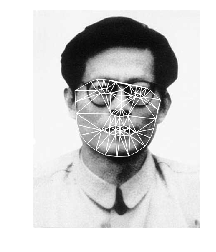

In [37]:
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

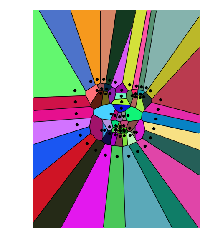

In [39]:

img_copy = img.copy()
draw_voronoi(img_copy, subdiv)

plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [40]:
pts = []
for t in subdiv.getTriangleList():
    pt = ((t[0],t[1]), (t[2],t[3]), (t[4],t[5]))
    if rect_contains(rect, pt[0]) and rect_contains(rect, pt[1]) and rect_contains(rect, pt[2]):
        pts.append(np.array(pt))
pts = np.array(pts)

pts.shape

(112, 3, 2)

注意到这里得到的三角形数并不一致，所以匹配时虽然两者的landmark一一对应，但是三角形不一定一一对应，会以其中一个计算三角形，另一个以对应的下标warp的计算三角形的（提供“形状”的）那个图形上。

In [46]:
#np.savetxt('parts.txt',parts, fmt='%i')

In [45]:
np.savetxt?